In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!pip install konlpy

In [2]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [3]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


In [4]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [5]:
import konlpy
import nltk
from konlpy.tag import Kkma ### 꼬꼬마
from konlpy.tag import Hannanum ### 한나눔
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [82]:
import pandas as pd
# 그렇다면 연간 차트 상위권 순위 노래 제목을 빼보자.
chart_20_06 = pd.read_excel("/content/melon_2020.06.xlsx")
chart_20_07 = pd.read_excel("/content/melon_2020.07.xlsx")
chart_20_08 = pd.read_excel("/content/melon_2020.08.xlsx")
chart_20_09 = pd.read_excel("/content/melon_2020.09.xlsx")
chart_20_10 = pd.read_excel("/content/melon_2020.10.xlsx")
chart_20_11 = pd.read_excel("/content/melon_2020.11.xlsx")
chart_20_12 = pd.read_excel("/content/melon_2020.12.xlsx")
chart_21_01 = pd.read_excel("/content/melon_2021.01.xlsx")
chart_21_02 = pd.read_excel("/content/melon_2021.02.xlsx")
chart_21_03 = pd.read_excel("/content/melon_2021.03.xlsx")
chart_21_04 = pd.read_excel("/content/melon_2021.04.xlsx")
chart_21_05 = pd.read_excel("/content/melon_2021.05.xlsx")
chart_21_06 = pd.read_excel("/content/melon_2021.06.xlsx")

chart_2020_2021_Jahre = chart_20_06['제목']+chart_20_07['제목']+chart_20_08['제목']+chart_20_09['제목']+chart_20_10['제목']+chart_20_11['제목']+chart_20_12['제목']+chart_21_01['제목']+chart_21_02['제목']+chart_21_03['제목']+chart_21_04['제목']+chart_21_05['제목']+chart_21_06['제목']
chart_2020_2021_Jahre.to_csv("chart_2020_2021_Jahre.csv")

doc_ko = open("/content/chart_2020_2021_Jahre.csv").read()
doc_ko[1:2000]

from konlpy.tag import Okt
t = Okt()
doc_nouns = t.nouns(doc_ko)

print( len( doc_nouns ) )

984


In [83]:
ko = nltk.Text(doc_nouns, name="연간_차트")
print(type(ko))
print(len(ko.tokens))


<class 'nltk.text.Text'>
984


In [84]:
most_fre = ko.vocab().most_common(50)
most_fre

[('사랑', 48),
 ('너', 26),
 ('나', 25),
 ('밤', 24),
 ('모든', 24),
 ('널', 20),
 ('연애', 19),
 ('길잡이', 19),
 ('순간', 19),
 ('취향', 18),
 ('저격', 18),
 ('그녀', 18),
 ('이별', 18),
 ('마음', 16),
 ('꽃', 13),
 ('속', 13),
 ('네', 13),
 ('샴푸', 13),
 ('향', 13),
 ('거지', 13),
 ('것', 13),
 ('위', 13),
 ('시', 13),
 ('별', 12),
 ('노래', 12),
 ('날', 12),
 ('로', 11),
 ('취기', 11),
 ('산들', 11),
 ('남아', 11),
 ('오늘', 11),
 ('온', 11),
 ('집', 10),
 ('앞', 10),
 ('골목길', 10),
 ('봄날', 9),
 ('건', 8),
 ('잠', 8),
 ('선미', 8),
 ('적재', 8),
 ('왜', 8),
 ('마리아', 7),
 ('밤하늘', 7),
 ('살짝', 7),
 ('말', 7),
 ('움찔', 7),
 ('규현', 7),
 ('내', 7),
 ('더욱', 7),
 ('거짓말', 7)]

In [85]:
print(len(set(ko.tokens)))

173


In [119]:
from pandas import DataFrame
stop_words = []
# df = DataFrame(stop_words)
# df.to_csv("/content/불용어사전.csv")
new_ko = [ ]
for one_word in ko:
  if one_word not in stop_words:
    new_ko.append(one_word) 
print(new_ko)
df = DataFrame(new_ko)
df.to_csv("/content/연간제목차트_단어.csv")

['제목', '다시', '여기', '바닷가', '롤린', '롤린', '롤린', '로', '비', '마리아', '취기', '취향', '저격', '그녀', '산들', '건', '사랑', '밤하늘', '별', '밤하늘', '별', '라일락', '사랑', '줄', '마리아', '잠', '연애', '길잡이', '양요섭', '정은지', '라일락', '헤픈', '우연', '그', '여름', '여기', '바닷가', '취기', '취향', '저격', '그녀', '산들', '잠', '밤하늘', '별', '잠', '운전', '만해', '비', '마리아', '선미', '취기', '취향', '저격', '그녀', '산들', '건', '사랑', '잠', '밤하늘', '별', '깡', '다시', '여기', '바닷가', '선미', '노래', '내일', '기리보이', '서동현', '취기', '취향', '저격', '그녀', '산들', '별', '운전', '만해', '롤린', '살짝', '보라', '빛', '밤', '노래', '건', '사랑', '밤', '말', '연애', '길잡이', '라일락', '나비', '고양이', '백현', '로', '마음', '움찔', '순간', '취향', '저격', '그녀', '규현', '취기', '취향', '저격', '그녀', '산들', '내일', '기리보이', '서동현', '취기', '취향', '저격', '그녀', '산들', '내', '손', '손', '라라라', '사람', '소개', '사랑', '줄', '여름', '안', '싹', '황광희', '마리아', '딩가딩', '연애', '길잡이', '양요섭', '정은지', '운전', '만해', '너', '난', '나', '넌', '살짝', '내', '마음', '움찔', '순간', '취향', '저격', '그녀', '규현', '노래', '건', '사랑', '잠', '사람', '여름', '안', '싹', '황광희', '로', '하내', '마음', '움찔', '순간', '취향', '저격', '그녀', '규현', '선미', '노래'

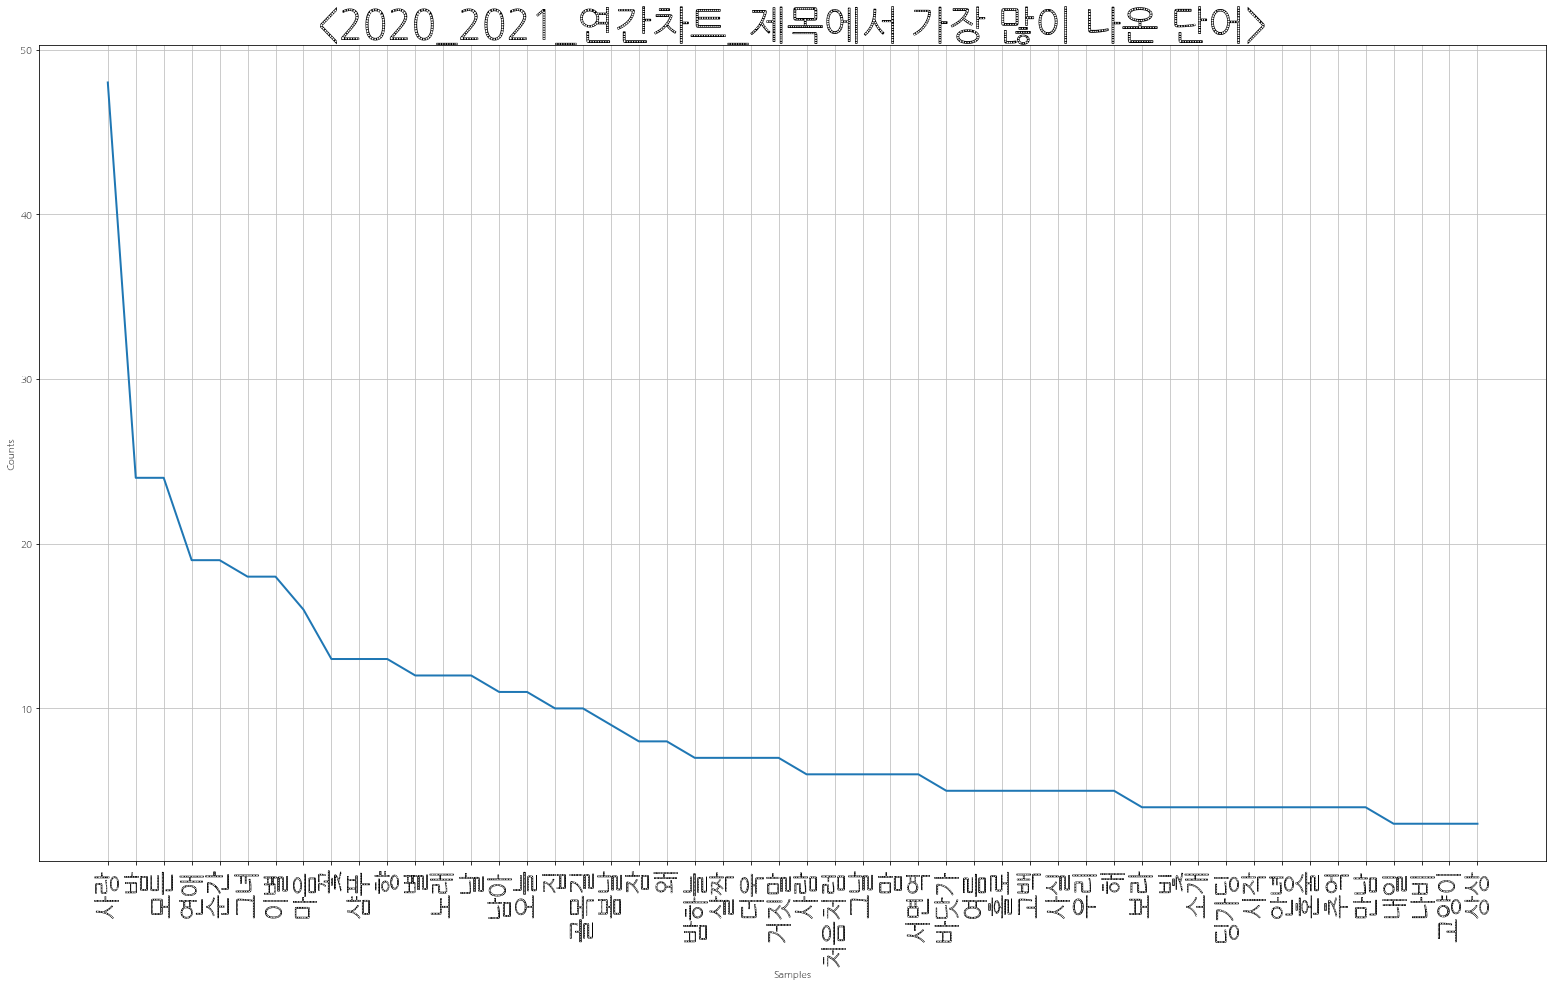

In [87]:
### nltk Text 객체 만들기
new_ko = nltk.Text(new_ko, name="연간_2020-2021")
plt.figure(figsize=(27,15))
plt.title("<2020_2021_연간차트_제목에서 가장 많이 나온 단어>", fontsize=40)
plt.xticks(fontsize=26)
new_ko.plot(50)

In [88]:
data = new_ko.vocab().most_common(1000)

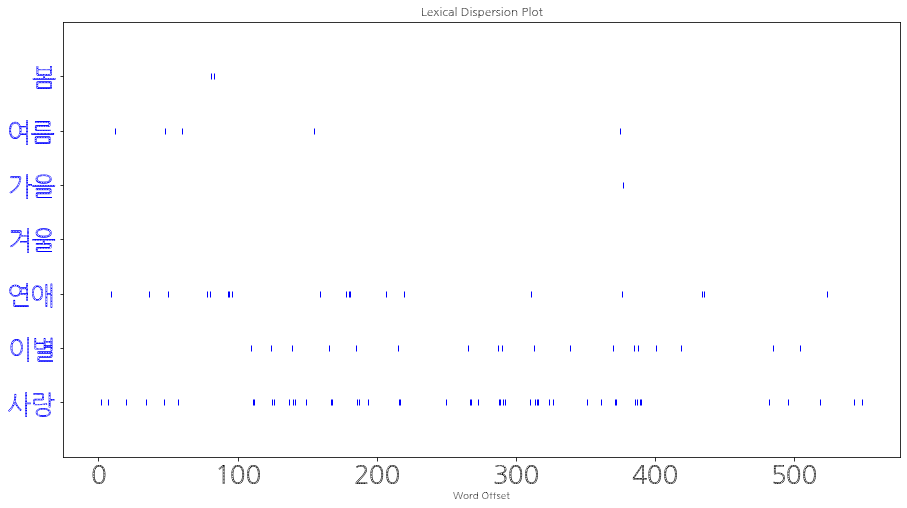

In [89]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
new_ko.dispersion_plot(['봄', '여름','가을','겨울', '연애','이별','사랑'])

> 이미지 워드클라우드 마스크

In [14]:
# pip install stylecloud
# import stylecloud

# my_long_list = ['시', '거지', '내', '네', '건', '것', '길잡이', 
#               '나', '너', '이', '시', '위', '취기', '정은지', '양요섭', '산들',
#               '취향', '저격', '롤린', '로', '마', '말', '아이', '적재', '기리보이',
#               '운전', '만해', '서동현', '허각', '선미','움찔', '앞', '규현']

# text={"연애":500, "밤하늘":253, "봄":233, "봄날":323, "꽃":322}

# stylecloud.gen_stylecloud(text=text, icon_name="fab fa-itunes-note", 
#                           palette='cartocolors.diverging.TealRose_7', 
#                           custom_stopwords=my_long_list, 
#                           font_path="/content/BMHANNAProOTF.otf")

# stylecloud.gen_stylecloud(file_path="/content/chart_2021_spring", 
#                           icon_name="fab fa-itunes-note", 
#                           palette='cartocolors.diverging.TealRose_7')
# stylecloud.png

In [94]:
winter_mask = np.array(Image.open("/content/music.png"))
winter_mask[0]


array([[248, 248, 248],
       [247, 247, 247],
       [247, 247, 247],
       ...,
       [247, 247, 247],
       [247, 247, 247],
       [247, 247, 247]], dtype=uint8)

In [95]:
wc = WordCloud(font_path="/content/D2Coding.ttf",
              background_color='white', 
               max_words=200,
               mask=winter_mask,   
               contour_width=3, 
               contour_color='steelblue').generate_from_frequencies(dict(data))

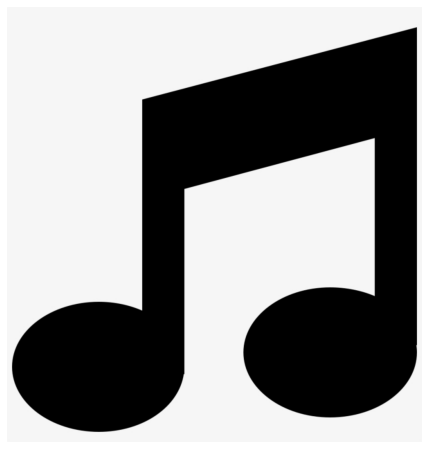

In [96]:
plt.figure(figsize=(15,8)) # 크기
plt.imshow(winter_mask, cmap=plt.cm.gray) #bilinear - 보정
plt.axis('off')
plt.show()

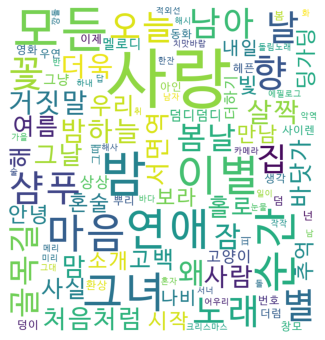

In [97]:
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis("off")
plt.show()